# Seedbox Technical challenge

## Preliminary Work

Let us now import the packages we will need inorder to carry out this challenge

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

let us now read in our csv files we will need to look at

In [2]:
transaction_data = pd.read_csv("transData.csv")
test_sample = pd.read_csv("testSamples.csv")

lets take a glimpse at the data presented to us, as well as any other info we can see at a glance.

In [3]:
transaction_data

,transaction_id,sample_id,transaction_type,transaction_amount
0,52346326,11,REBILL,24.95
1,52346327,11,REBILL,24.95
2,52346328,32,REBILL,29.95
3,52346329,32,REBILL,29.95
4,52346330,32,REBILL,29.95
...,...,...,...,...
7425,52353751,59654,REBILL,39.95
7426,52353752,59654,REBILL,39.95
7427,52353753,59689,REBILL,24.95
7428,52353754,59689,REBILL,24.95


In [4]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7430 entries, 0 to 7429
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   transaction_id      7430 non-null   int64  
 1   sample_id           7430 non-null   int64  
 2   transaction_type    7430 non-null   object 
 3   transaction_amount  7430 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 232.3+ KB


In [5]:
transaction_data.describe()

,transaction_id,sample_id,transaction_amount
count,7.430000e+03,7430.000000,7430.000000
mean,5.235004e+07,30245.874024,24.935720
std,2.145001e+03,17064.733330,15.050653
min,5.234633e+07,11.000000,-39.950000
25%,5.234818e+07,15866.250000,24.950000
50%,5.235004e+07,30557.000000,24.950000
75%,5.235190e+07,44945.000000,32.950000
max,5.235376e+07,59694.000000,39.950000


the above table is used more for understanding the transaction_amount and seeing the values, for further insight

We have a table for the transData.csv with 7430 rows, and 4 columns, of those 4 they are transaction id (type int), sample id (type int), transaction type (string type), and transaction amount (float type)

transaction_id is the the unique identifier to label each transaction, i.e. to potentially have ease of search

sample_id, the users id that connects with the bottom table to label which group they belong to

transaction_amount, the dollar value of the transaction_type

transaction_type, one of CHARGEBACK, REBILL, REFUND (the names should be self evident to what they are)

In [6]:
test_sample

,sample_id,test_group
0,1,0
1,2,1
2,3,0
3,4,1
4,5,1
...,...,...
59716,59717,0
59717,59718,0
59718,59719,1
59719,59720,0


In [7]:
test_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59721 entries, 0 to 59720
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   sample_id   59721 non-null  int64
 1   test_group  59721 non-null  int64
dtypes: int64(2)
memory usage: 933.3 KB


For the testSamples.csv we have a table with 59,721 rows and 2 columns, 2 of which are sample id (type int) and test group (type int)


test group being the indictation of whether our user is in the control (0) or the test group (1)

sample_id is the id that we will use to merge with the other table as the unique identifier to associate each users actions based on group

Before we proceed any further we need to check for any NaN's in our data set to ensure they don't alter the results in any way

In [8]:
test_sample.isna().sum()

sample_id     0
test_group    0
dtype: int64

In [9]:
transaction_data.isna().sum()

transaction_id        0
sample_id             0
transaction_type      0
transaction_amount    0
dtype: int64

Good news, no NaN's, we won't need to do any additional work to drop or fill in the values (situation dependent).

## What is the aproximate probability distribution between the test group and the control group

Because the variables are both categorical, and the question is asking for the probability between the two groups, our distribution becomes a discrete probability distribution.

Now there are different ways of deivising the distribution, we can simply do the counts within the merging of the tables or just the testSamples.csv table or we can go further and do it per count of each variable in the combined table below based on the columns.

I want to note that, the tables seem to be columns with buckets devising them of counts, hence take the transaction_type and see that there are three buckets in REFUND, REBILL and CHARGEBACK, and the same is with transaction_amount with only a few varying prices

I have included the testSamples.csv's table and the combined datas distribution

----

### Combined Data Distribution

In [10]:
combined_data = pd.merge(transaction_data, test_sample, how="inner", on=["sample_id","sample_id"])
combined_data

,transaction_id,sample_id,transaction_type,transaction_amount,test_group
0,52346326,11,REBILL,24.95,1
1,52346327,11,REBILL,24.95,1
2,52346328,32,REBILL,29.95,1
3,52346329,32,REBILL,29.95,1
4,52346330,32,REBILL,29.95,1
...,...,...,...,...,...
7425,52353751,59654,REBILL,39.95,1
7426,52353752,59654,REBILL,39.95,1
7427,52353753,59689,REBILL,24.95,0
7428,52353754,59689,REBILL,24.95,0


In [11]:
combined_data.groupby("test_group").count()

,transaction_id,sample_id,transaction_type,transaction_amount
test_group,,,,
0,4050,4050,4050,4050
1,3380,3380,3380,3380


In [12]:
print("0:",4050/7430)

0: 0.5450874831763123


In [13]:
print("1:",3380/7430)

1: 0.4549125168236878


Control group makes up ~55% of the occurences whereas the test group makes up the remaining 45%

In [14]:
group_ids = combined_data.groupby("test_group").count().index
group_ids = [str(i) for i in group_ids]
group_ids

['0', '1']

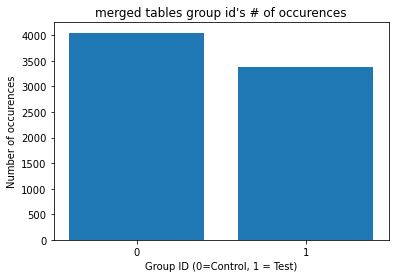

In [15]:
plt.figure()
plt.bar(group_ids, combined_data.groupby("test_group").count()["transaction_id"] )
plt.xlabel("Group ID (0=Control, 1 = Test)")
plt.ylabel("Number of occurences")
plt.title("merged tables group id's # of occurences")
plt.show()

----

### testSample.csv Distribution

In [16]:
group_ids = test_sample.groupby("test_group").count().index
group_ids = [str(i) for i in group_ids]
group_ids

['0', '1']

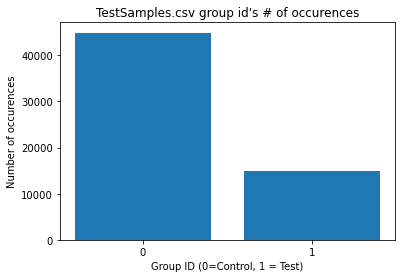

In [17]:
plt.figure()
plt.bar(group_ids, test_sample.groupby("test_group").count()["sample_id"])
plt.xlabel("Group ID (0=Control, 1 = Test)")
plt.ylabel("Number of occurences")
plt.title("TestSamples.csv group id's # of occurences")
plt.show()

In [18]:
test_sample.groupby("test_group").count()["sample_id"]

test_group
0    44886
1    14835
Name: sample_id, dtype: int64

In [19]:
print("0:", 44886/59721)

0: 0.751594916361079


In [20]:
print("1:", 14835/59721)

1: 0.24840508363892097


Control group makes up ~75% of the occurences wheres as the test group makes up the remaining ~25%

------------

## Is a user that must call-in to cancel more likely to generate at least 1 addition(al) REBILL?

The reality here is that because the results are based on occurrence we are essentially looking at categorical variables and the number of times they occur, this way when we set up the table we’ll see that it’s a contingency table that a chi-square test can test to see if calling in or web forms are independent of each other for a rebill or dependent on each other.

let us now combine the two tables to get one large one

In [21]:
combined_data = pd.merge(transaction_data, test_sample, how="inner", on=["sample_id","sample_id"])
combined_data

,transaction_id,sample_id,transaction_type,transaction_amount,test_group
0,52346326,11,REBILL,24.95,1
1,52346327,11,REBILL,24.95,1
2,52346328,32,REBILL,29.95,1
3,52346329,32,REBILL,29.95,1
4,52346330,32,REBILL,29.95,1
...,...,...,...,...,...
7425,52353751,59654,REBILL,39.95,1
7426,52353752,59654,REBILL,39.95,1
7427,52353753,59689,REBILL,24.95,0
7428,52353754,59689,REBILL,24.95,0


Lets break down based on how many recorded transactions (this word used loosley) there are now

In [22]:
combined_data.groupby("test_group").count()

,transaction_id,sample_id,transaction_type,transaction_amount
test_group,,,,
0,4050,4050,4050,4050
1,3380,3380,3380,3380


In [23]:
4050/7430

0.5450874831763123

In [24]:
3380/7430

0.4549125168236878

The test group (call-in's) make up ~45%, where as the control (web) make up ~55%

The above is not based on unique users, lets now refine the scope so we can see based on each user if they are more likely to rebill if they call in

In [25]:
combined_data["sample_id"] = combined_data["sample_id"].drop_duplicates()

In [26]:
combined_data

,transaction_id,sample_id,transaction_type,transaction_amount,test_group
0,52346326,11.0,REBILL,24.95,1
1,52346327,NaN,REBILL,24.95,1
2,52346328,32.0,REBILL,29.95,1
3,52346329,NaN,REBILL,29.95,1
4,52346330,NaN,REBILL,29.95,1
...,...,...,...,...,...
7425,52353751,59654.0,REBILL,39.95,1
7426,52353752,NaN,REBILL,39.95,1
7427,52353753,59689.0,REBILL,24.95,0
7428,52353754,NaN,REBILL,24.95,0


In [27]:
combined_data.dropna(inplace=True)

In [28]:
combined_data

,transaction_id,sample_id,transaction_type,transaction_amount,test_group
0,52346326,11.0,REBILL,24.95,1
2,52346328,32.0,REBILL,29.95,1
6,52346332,103.0,REBILL,19.95,0
17,52346343,109.0,REBILL,19.95,0
18,52346344,127.0,REBILL,32.95,0
...,...,...,...,...,...
7422,52353748,59628.0,REBILL,39.95,1
7424,52353750,59631.0,REFUND,-24.95,1
7425,52353751,59654.0,REBILL,39.95,1
7427,52353753,59689.0,REBILL,24.95,0


In [29]:
combined_data.groupby("test_group").count()

,transaction_id,sample_id,transaction_type,transaction_amount
test_group,,,,
0,1079,1079,1079,1079
1,1635,1635,1635,1635


In [30]:
1079/2714

0.39756816507000736

In [31]:
1635/2714

0.6024318349299926

Now the test group makes up ~60% of the users whereas the control makes up ~40%

In [32]:
#combined_data.groupby("test_group").groupby("")

Lets get a glimpse on how the transaction_type's are broken down between both groups together and separately 

In [33]:
combined_data.groupby("transaction_type").count()

,transaction_id,sample_id,transaction_amount,test_group
transaction_type,,,,
CHARGEBACK,74,74,74,74
REBILL,2497,2497,2497,2497
REFUND,143,143,143,143


In [34]:
q1 = combined_data.groupby(["test_group","transaction_type"]).size()
q1 = pd.DataFrame(q1)
q1

0
test_group transaction_type      
0          CHARGEBACK          51
           REBILL             941
           REFUND              87
1          CHARGEBACK          23
           REBILL            1556
           REFUND              56

So just at a glance we can see that the test group has more rebill's than the control group as there are 1556 unique users who rebill if they call in as oppose to 941 who rebill if they can cancel on the web. This answers our question.... BUT we need to verify it didn't happen by chance

Let us now conduct a chi-square test to test our indepence of our two groups

We will conduct two tests, one that does all transactions and one that does just rebill's to get a full scope of whats going on

H_0: There is no relationship between test and control groups in terms of the transaction type

H_a: There is a relationship between the test and control in terms of the transaction type

In [35]:
# q1 = {"":[],"":[],"":[]}
q1 = {"CHARGEBACK":[51,23],"REBILL":[941,1556],"REFUND":[87,56]}
q1 = pd.DataFrame(q1, index = [0,1])
q1

,CHARGEBACK,REBILL,REFUND
0,51,941,87
1,23,1556,56


In [36]:
stats.chi2_contingency(q1)

(57.28671311410747,
 3.633693600923662e-13,
 2,
 array([[  29.42004422,  992.72770818,   56.85224761],
        [  44.57995578, 1504.27229182,   86.14775239]]))

With a p-value of 3.633693600923662e-13 which is less than our threshold of 0.05, we reject the null (H_0) in favour of our alternative (H_a) and say they are dependent on each other in terms of the transaction type.

Now the above is quite general but it says that if we know the transaction types of one group we can predict the other, meaning if we know we have X number of chargebacks for the control group then we can predict our test groups value as they are dependent, and from just looking at the data, we can say that chances are the test group will have less chargebacks.

The example above is a more specific version of what I am trying to answer, in reality its for all transaction types, I just picked one specifically to make a claim and use it to answer the question at hand.

So now we can conduct our chisquare for rebill's between the groups

H_0: There is no relationship between test and control groups in terms of the number of rebill's

H_a: There is a relationship between the test and control in terms of the number of rebill's

In [37]:
q1 = {"REBILL":[941,1556]}
q1 = pd.DataFrame(q1, index = [0,1])
q1

,REBILL
0,941
1,1556


In [38]:
stats.chi2_contingency(q1)

(0.0,
 1.0,
 0,
 array([[ 941.],
        [1556.]]))

with a p-value of 0, we reject the null in favour of our alternative in there is a relationship between the groups and the number of rebill's and like the above, if we know one of the values for the groups we can predict the other, so in general cases we can say that if we know the number of rebill's for the control group is X we can predict the test group's number of rebill's and based on the info/data we have its likely its > X rebill's as constructed by the control group

To the answer the question, if a user/customer does have to call in, they are more likely to rebil than if they don't have to call in and use the web form


------

## Is a user that must call-in to cancel more likely to generate more revenues?

Unlike the above test, because we have revenue here per group so we can conduct a two-sided t-test on the average revenue each group generates to further prove the total revenue summation shown below. 

Let us take a look at the breakdown of the number of occurences for each payment amount for the control and test group to get some further info before we sum and avergae to perform our test

In [39]:
combined_data = pd.merge(transaction_data, test_sample, how="inner", on=["sample_id","sample_id"])
combined_data

,transaction_id,sample_id,transaction_type,transaction_amount,test_group
0,52346326,11,REBILL,24.95,1
1,52346327,11,REBILL,24.95,1
2,52346328,32,REBILL,29.95,1
3,52346329,32,REBILL,29.95,1
4,52346330,32,REBILL,29.95,1
...,...,...,...,...,...
7425,52353751,59654,REBILL,39.95,1
7426,52353752,59654,REBILL,39.95,1
7427,52353753,59689,REBILL,24.95,0
7428,52353754,59689,REBILL,24.95,0


In [40]:
combined_data.groupby(["test_group","transaction_amount"]).size()

test_group  transaction_amount
0           -32.95                  90
            -24.95                  97
            -19.95                 107
             19.95                1189
             24.95                1368
             32.95                1199
1           -39.95                  50
            -29.95                  64
            -24.95                  61
             24.95                1124
             29.95                1031
             39.95                1050
dtype: int64

In [41]:
q2 = combined_data.groupby(["test_group"]).sum("transaction_amount")
q2

,transaction_id,sample_id,transaction_amount
test_group,,,
0,212017293052,119548895,89838.9
1,176943507863,105177949,95433.5


By just looking at total revenue we can see that the test group generates more revenue than the control group

Lets now see their averages and see how each user in the group contributes

In [42]:
q2 = combined_data.groupby(["test_group"]).mean("transaction_amount")
q2

,transaction_id,sample_id,transaction_amount
test_group,,,
0,5.234995e+07,29518.245679,22.182444
1,5.235015e+07,31117.736391,28.234763


The test group generates per user more revenue than each user in the control group, meaning just by looking at the data, we can say that a user who calls in is more likely to generate more revenue than someone who doesn't. Like the previous question we need to perform a test, specifically a two-sided t-test to say wtihout reasonable doubt our two groups have different means 

In [43]:
q2.drop(columns=["transaction_id","sample_id"], inplace=True)

Lets define our null and alternate hypothesis for this test (note this is an unpaired two-sided t-test)

H_0: The mean of our revenue is the same in the test group as is the control group

H_A: The mean of our revenue is not the same in the test group as is the control group

In [44]:
test_group = combined_data[combined_data["test_group"] == 1]
test_group = test_group["transaction_amount"]
test_group

0       24.95
1       24.95
2       29.95
3       29.95
4       29.95
        ...  
7423    39.95
7424   -24.95
7425    39.95
7426    39.95
7429    24.95
Name: transaction_amount, Length: 3380, dtype: float64

In [45]:
control_group = combined_data[combined_data["test_group"] == 0]
control_group = control_group["transaction_amount"]
control_group

6       19.95
7       19.95
8       19.95
9       19.95
10      19.95
        ...  
7417    24.95
7418    24.95
7419    24.95
7427    24.95
7428    24.95
Name: transaction_amount, Length: 4050, dtype: float64

In [46]:
two_sample_test = stats.ttest_ind(test_group, control_group)
print(two_sample_test)

Ttest_indResult(statistic=17.61637445019746, pvalue=4.410306919832482e-68)


with a small p-value of 4.410306919832482e-68 whiich is less than our significance level of 0.05, we reject the null hypothesis in favour of our alternative hypothesis that the mean revenue per user in each group is different, which allows us to go back to our claim as stated above, in that if a customer does call in, they are more likely to generate more revenue.

Note, because each customer is randomly placed in each group and not the other we are not doing a paired t-test as each user belongs to one group.

-----

## Is a user that must call-in more likely to produce a higher chargeback rate(CHARGEBACKs/REBILLs)?

In [47]:
combined_data = pd.merge(transaction_data, test_sample, how="inner", on=["sample_id","sample_id"])


In [48]:
combined_data.groupby(["test_group","transaction_type"]).size()

test_group  transaction_type
0           CHARGEBACK           106
            REBILL              3756
            REFUND               188
1           CHARGEBACK            57
            REBILL              3205
            REFUND               118
dtype: int64

In [49]:
test_group = combined_data[combined_data["test_group"] == 1]
control_group = combined_data[combined_data["test_group"] == 0]

In [50]:
test_group_charge = test_group[test_group["transaction_type"] == "CHARGEBACK"]
test_group_rebill = test_group[test_group["transaction_type"] == "REBILL"]
control_group_charge = control_group[control_group["transaction_type"] == "CHARGEBACK"]
control_group_rebill = control_group[control_group["transaction_type"] == "REBILL"]

In [51]:
test_group_charge.shape[0]/test_group_rebill.shape[0]

0.017784711388455537

In [52]:
control_group_charge.shape[0]/control_group_rebill.shape[0]

0.028221512247071354

Based on the above values, our control group has a higher chargeback rate of ~2.82% as oppose to the test groups charge back rate of ~1.77%

A user who calls in has a lower charge back rate than user who uses the web form

Note, I don't see the use of statistical test here to generate any further conclusion, as although a chi-square test might further show the results the question seems to be more of a can you find the values and show the result approach.

## Side Notes:

The use of statistical tests for this technical assessment may be excessive and simply not needed, as based on the questions we can simply derive the information by going through the data and showing results. The use of the words "Draw conclusions from observations" can be intrepreted as either, observations from statistical tests or simply looking at the data the way we need to answer the question at hand.

I have gone through the liberty of using both a .py and .pynb to display the code, this file provides the code and detail better than .py file, but in a production environment, if we want to re-use the code, the .py file is go to answer these questions should the data change/update.

I have only included the statistical tests in this file, as it is more manageable to display in this file than the python file, the python file's aim is to simply answer and show the results